############### NOTE BOOK WRITTEN IN BOTH FRENCH AND ENGLISH SELON MES HUMEURS :) BONNE VISUALISATION :) 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stat

ModuleNotFoundError: No module named 'scipy.stat'

In [2]:
# Modification des options d'affichage des colonnes
pd.set_option('display.max_colwidth', -1)

# Modification des options d'affichage du dataset
pd.set_option('display.max_column', 181)

<ipython-input-2-18a10cc31f27>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Lecture du dataframe
df = pd.read_csv("dataset_clean_project_4.csv", index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 1 to 50226
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CouncilDistrictCode                1466 non-null   float64
 1   YearBuilt                          1466 non-null   int64  
 2   NumberofBuildings                  1466 non-null   float64
 3   NumberofFloors                     1466 non-null   float64
 4   PropertyGFATotal                   1466 non-null   float64
 5   PropertyGFAParking                 1466 non-null   float64
 6   LargestPropertyUseTypeGFA          1466 non-null   float64
 7   ENERGYSTARScore                    1017 non-null   float64
 8   SiteEUI(kBtu/sf)                   1466 non-null   float64
 9   SourceEUI(kBtu/sf)                 1466 non-null   float64
 10  SiteEnergyUse(kBtu)                1466 non-null   float64
 11  SteamUse(kBtu)                     1466 non-null   floa

In [5]:
df.describe()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,Zip
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1017.000000,1466.000000,1466.000000,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1423.000000,1423.000000,1466.000000,1466.000000,1466.000000,1466.000000,1428.000000
mean,4.288881,1961.364256,1.029332,3.525239,85275.621078,10049.209413,70809.305252,65.229597,63.589291,156.018861,4.631178e+06,1.623952e+05,3.334007e+06,1.118523e+06,94.046824,1.191989,47.616051,-122.332790,96.259291,1.395723,98116.803221
std,2.190409,32.452911,0.400289,4.846840,102287.879815,32549.539405,81781.833557,27.489997,50.342416,121.852784,5.593243e+06,9.803380e+05,4.556807e+06,1.815891e+06,139.574289,1.720980,0.049677,0.025045,135.193368,1.654611,15.770199
min,1.000000,1900.000000,0.500000,0.000000,11285.000000,-1.000000,6455.000000,1.000000,3.250000,6.350000,1.132262e+05,0.000000e+00,7.000000e+00,0.000000e+00,0.000000,0.000000,47.509512,-122.411741,0.000000,0.000000,98101.000000
25%,2.000000,1930.000000,1.000000,1.000000,28805.000000,0.000000,25040.750000,48.000000,32.074999,75.149999,1.173348e+06,0.000000e+00,6.958938e+05,0.000000e+00,18.900000,0.165000,47.582625,-122.343621,19.450000,0.340000,98105.000000
50%,4.000000,1965.000000,1.000000,2.000000,46798.500000,0.000000,41659.500000,72.500000,50.125000,125.949999,2.317438e+06,0.000000e+00,1.487957e+06,4.682908e+05,45.020000,0.640000,47.612386,-122.332603,46.515000,0.840000,98112.000000
75%,7.000000,1988.000000,1.000000,4.000000,94452.500000,0.000000,80390.000000,88.000000,77.350001,190.350002,5.811546e+06,0.000000e+00,4.075170e+06,1.274024e+06,110.165000,1.540000,47.650731,-122.321242,116.890000,1.790000,98125.000000
max,7.000000,2015.000000,10.000000,99.000000,861702.000000,407795.000000,748011.000000,100.000000,297.349994,857.650006,3.293229e+07,1.552743e+07,3.122565e+07,1.354382e+07,1936.340000,31.380000,47.733840,-122.258729,1510.850000,14.940000,98199.000000


In [6]:
# Retrait des variables non utilisées
df = df.drop(['SiteEUI(kBtu/sf)',
              'SourceEUI(kBtu/sf)'], axis=1)

## Feature engineering

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


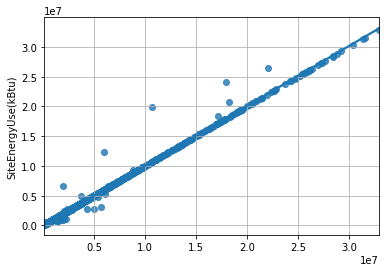

In [7]:
# Création de nouvelles variables à partir des variables énergétiques
sns.regplot(df['NaturalGas(kBtu)'] + df['SteamUse(kBtu)'] +
            df['Electricity(kBtu)'], df['SiteEnergyUse(kBtu)'])
plt.grid(True)

In [8]:
# Variables ratio énergie
df['elec_prop'] = df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['steam_prop'] = df['SteamUse(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['natgas_prop'] = df['NaturalGas(kBtu)'] / df['SiteEnergyUse(kBtu)']

# Variables booléennes nature des énergies utilisées
df['elec_bool'] = (df['elec_prop'] > 0)
df['steam_bool'] = (df['steam_prop'] > 0)
df['natgas_bool'] = (df['natgas_prop'] > 0)

In [9]:
# Définition des features
features_initial = ['CouncilDistrictCode',
                    'YearBuilt',
                    'NumberofBuildings',
                    'NumberofFloors',
                    'PropertyGFATotal',
                    'PropertyGFAParking',
                    'LargestPropertyUseTypeGFA',
                    'ENERGYSTARScore',
                    'BuildingType',
                    'PrimaryPropertyType',
                    'Neighborhood',
                    'ListOfAllPropertyUseTypes',
                    'LargestPropertyUseType',
                    'elec_prop',
                    'steam_prop',
                    'natgas_prop',
                    'elec_bool',
                    'natgas_bool']

In [10]:
print("Nombres de features initials = {}".format(len(features_initial)))

Nombres de features initials = 18


In [11]:
# Définition des variables numériques et catégorielles
numerical_cols = df[features_initial].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[features_initial].select_dtypes(include=['object', 'bool']).columns

# Train/Test Split

In [12]:
# Split en jeu d'entrainement et de test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, train_size=0.8, random_state=0)

In [13]:
len(train_set)

1172

# Preprocessing 

In [14]:
# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
# Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
# Transformers
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


# Preprocessing for numerical data 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #SimpleImputer : replace missing values using the mean along each column
    ('std_scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])



# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()), # Targetencoder : For the case of categorical target: features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('std_scaler', StandardScaler()),  
])

# Bundle preprocessing for numerical and categorical data

preprocessor = ColumnTransformer( # ColumnTransformer : Applies transformers to columns of an array or pandas DataFrame
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [15]:
# Bundle preprocessing and modeling code in a pipeline

def define_pipeline(preprocessor, regressor):

    modeling_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', regressor)
                                        ])

    return modeling_pipeline

## Plotting with different regressors and calculating metrics RMSE R2 MAE for each regressor


In [16]:
# Regressors
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


# Dictionnaire de regresseurs
regressors = {
    'Dummy': DummyRegressor(), 
    
    
    'Linear': LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'Elastic Net': ElasticNet(),
    
    'SVR': SVR(kernel="rbf", C=300, gamma=1),
    
    
    'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=-1),
    'Extra Tree': ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state = 42),
}

In [19]:

rmse_without = []
r2_without = []

def plot_1(reg, features):

    with plt.style.context('bmh'):
        f, (ax0) = plt.subplots(1, sharey=True)

        
        regr = define_pipeline(preprocessor, reg)
        regr.fit(train_set[features], train_set['SiteEnergyUse(kBtu)'])
        energy_pred = regr.predict(test_set[features])
        
        rmse_without.append(mean_squared_error(test_set['SiteEnergyUse(kBtu)'], energy_pred, squared=False))
        r2_without.append(r2_score(test_set['SiteEnergyUse(kBtu)'], energy_pred))

        ax0.scatter(test_set['SiteEnergyUse(kBtu)'], energy_pred)
        ax0.plot([0, 10**8],[0, 10**8])
        ax0.set_ylabel('Target predicted')
        ax0.set_xlabel('True Target')
        ax0.set_title(
            reg)
        ax0.text(0.5*10**7, 0.7*10**8, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.2f' % (
            r2_score(test_set['SiteEnergyUse(kBtu)'], energy_pred), 
            median_absolute_error(test_set['SiteEnergyUse(kBtu)'], energy_pred), 
            mean_squared_error(test_set['SiteEnergyUse(kBtu)'], energy_pred, squared=False)))
        ax0.set_xlim([0, 0.7*10**8])
        ax0.set_ylim([0, 0.8*10**8])
        
        
        


C:\Users\hp\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\hp\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\hp\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\hp\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\hp\anaconda3\lib\site-packages\category_encoders\utils.py:21: F

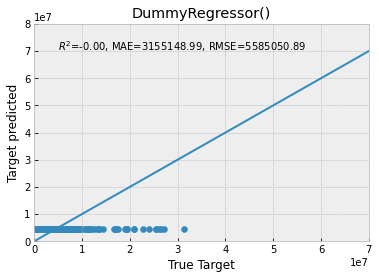

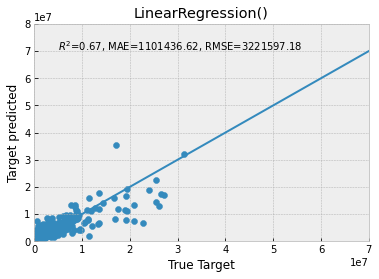

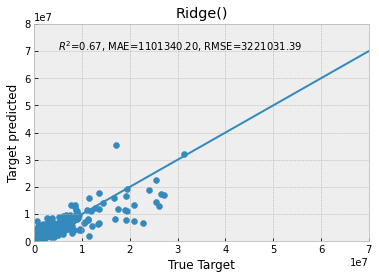

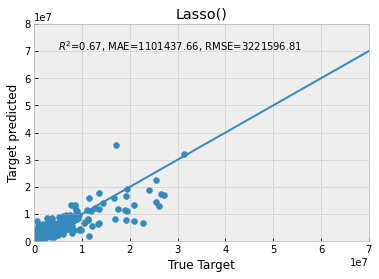

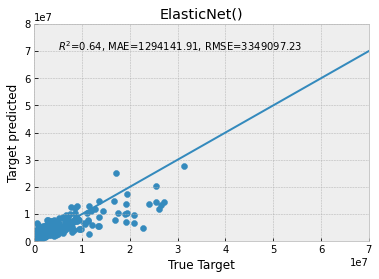

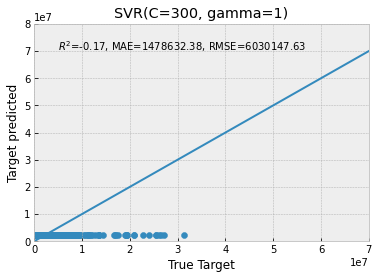

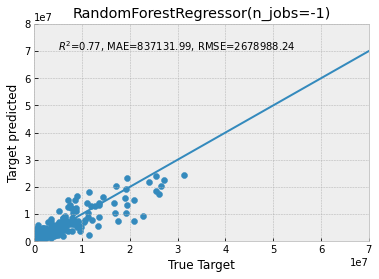

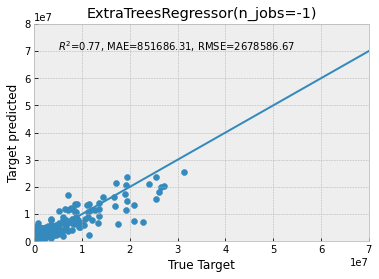

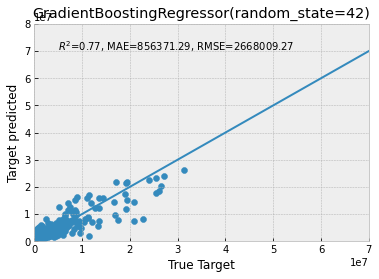

In [20]:
# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


for name_reg, reg in regressors.items() :
    plot_1(reg, features_initial)

## Looking for best model for energy variable ''SiteEnergyUse(kBtu)''

In [61]:
 # Dictionnaires de résultats
y_pred = {}
rmse = {}
r2 = {}
final_model = {}

# Résultats, moyenne et écart-type
def display_scores(scores, scoring=["neg_mean_squared_error", "r2"]) :
    
    print("Resultats de la cross validation :")
     
    for metric in scoring : 
    
        print("Métrique utilisé : {} \n".format(metric))
        results = -scores["test_" + metric]
        if metric == "neg_mean_squared_error" :
            results = np.sqrt(results) #RMSE
        elif metric == "r2" :
            results = scores["test_" + metric]
            
        print("\t - Moyenne :", results.mean())
        print("\t - Ecart-type :", results.std())
        print("\t - Coefficient de variation : {:.2f} %".format(results.std()/results.mean()*100))
        print("\n")
      

In [62]:

# Cross validation avec 2 métriques
def cross_val(estimator, X, y):

    kf = KFold(n_splits=10)

   
    scores = cross_validate(estimator,
                            X,
                            y,
                            scoring=["neg_mean_squared_error",
                                     "neg_mean_absolute_error",
                                     "r2"],
                            cv=kf)

    return scores

In [63]:
# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve

import sys, warnings
warnings.filterwarnings("ignore")

# Les regresseurs sont testés 1 à 1 par cross-validation
for name_reg, reg in regressors.items():
    
    print("_____", name_reg, "_____")

    pipeline = define_pipeline(preprocessor, reg)

    # cross-validation
    scores = cross_val(pipeline,
                       train_set[features_initial],
                       train_set['SiteEnergyUse(kBtu)'])

    # calcul de la RMSE
    rmse[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])

    # calcul de R2
    r2[name_reg] = scores["test_r2"]

    # Affichage des résultats
    display_scores(scores,
                   scoring=["neg_mean_squared_error",
                            "r2"])

_____ Dummy _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 5510176.213287698
	 - Ecart-type : 997467.1663040251
	 - Coefficient de variation : 18.10 %


Métrique utilisé : r2 

	 - Moyenne : -0.019032065397525843
	 - Ecart-type : 0.02512290993488858
	 - Coefficient de variation : -132.00 %


_____ Linear _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 3022183.0708055156
	 - Ecart-type : 574226.8351358848
	 - Coefficient de variation : 19.00 %


Métrique utilisé : r2 

	 - Moyenne : 0.6848294026630306
	 - Ecart-type : 0.077708438492584
	 - Coefficient de variation : 11.35 %


_____ Ridge _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 3021174.407487627
	 - Ecart-type : 574274.325516849
	 - Coefficient de variation : 19.01 %


Métrique utilisé : r2 

	 - Moyenne : 0.6850885864246173
	 - Ecart-type : 0.07755629863523601
	 - Coefficient d

In [64]:
# Barplot des résultats RMSE
def graphical_display(results, title) :
    
    x = list(results)
    y = np.array(list(results.values()))
    mean = [score.mean() for score in np.array(list(results.values()))]

    fig = plt.figure(1, figsize=(17,19))
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1
    
    plt.subplot(311)
    sns.barplot(x=x, y=mean)
    plt.ylabel("Moyenne")
    plt.title(title)
    for index, value in enumerate(mean):
        plt.text(index-0.3, value+0.2, str("{:.2e}".format(value)))
    
    plt.show()

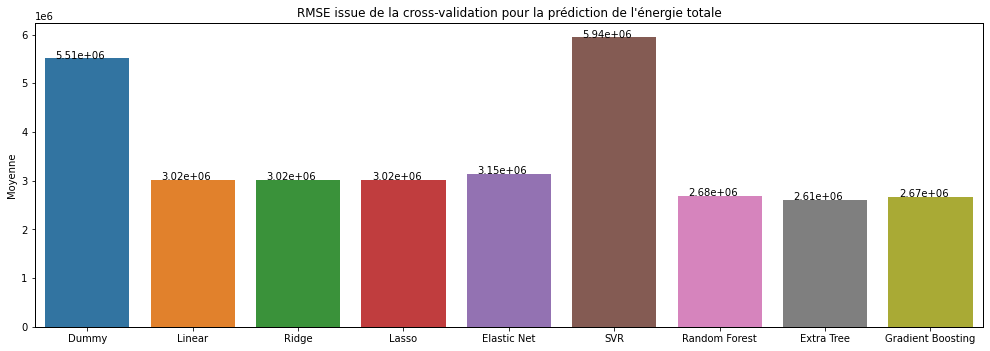

In [66]:
# Affichage des résultats de la RMSE pour chaque modèle
graphical_display(rmse, "RMSE issue de la cross-validation pour la prédiction de l'énergie totale")

In [70]:
models_to_plot = ['Random Forest',
                  'Extra Tree',
                  'Gradient Boosting']

In [73]:
# Boxplot des résultats R2
def boxplot(results, title, ylabel) :
    
    with plt.style.context('bmh'):        
        fig = plt.figure(1, figsize=(5,5))
        plt.rcParams["axes.edgecolor"] = "black"
        plt.rcParams["axes.linewidth"] = 1

        plt.boxplot([results[model] for model in models_to_plot], labels=models_to_plot)
        plt.ylabel(ylabel)
        plt.title(title)

        plt.show()

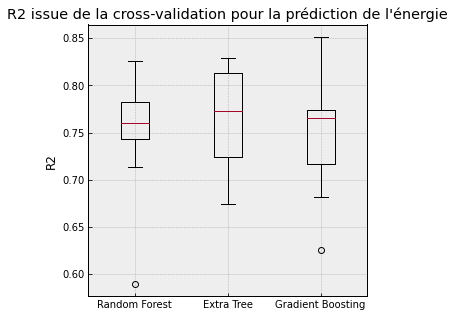

In [74]:
# Affichage des résultats de la R2 pour les trois modéles choisis
boxplot(r2, "R2 issue de la cross-validation pour la prédiction de l'énergie", "R2")

In [75]:

print('Les scores pour R2 et RMSE sont respectivement de {} et de {} soit {:.2%} d\'erreur par rapport à la valeur maximale de l\'énergie pour le modèle avec Gradient Boosting Regressor.'.format(r2['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean()/df['SiteEnergyUse(kBtu)'].max()))

Les scores pour R2 et RMSE sont respectivement de 0.7502944563753096 et de 2673206.0799120483 soit 8.12% d'erreur par rapport à la valeur maximale de l'énergie pour le modèle avec Gradient Boosting Regressor.


### Model Optimization  of Gradient Boosting regressor  for Energy target variable

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid_reg_tree = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'], # Méthode d'imputation des variables numériques
    'preprocessor__cat__imputer__strategy': ['mean', 'median'], # Méthode d'imputation des variables catégorielles
    'regressor__n_estimators' : [100, 150, 175, 200], # Nombre d'arbres
    'regressor__max_depth' : range(1, 10, 1), # Profondeurs maximums des arbres
    'regressor__max_features' : range(1, 10, 1), # Nombre de maximum de features considéré à chaque noeud de décision
    'regressor__learning_rate': [0.07, 0.1, 0.12, 0.14] # Taux d'apprentissage
}

In [81]:
# Fonction d'optimisation du modèle
def optimiser(regressor, preprocessor, x, y, target_name):
    # Définition du modèle avec les hyperparamètres par défaut
    model = define_pipeline(preprocessor, regressor)

    # Définition de la procédure d'évaluation
    cv = KFold(n_splits=10, shuffle=True)

    # Définition de la procédure RandomizedSearchCV 
    grid_search = RandomizedSearchCV(model, param_grid_reg_tree, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, n_iter=100,
                                     random_state=42)

    # Execution de la grid search
    grid_result = grid_search.fit(x, y)

    score = grid_result.best_estimator_.score(x, y)  # calcul du R2 sur tout le jeu d'entrainement
    
    final_model[target_name] = grid_result.best_estimator_ # Sauvergarde du model
    print("Hyperparamètres du meilleur modèle :", grid_result.best_params_)
    print('\n')
    print('____', 'SCORES :''____')
    print("R2 score sur tout le jeux d'entrainement: ", score)
    print("Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement:",
          np.sqrt(-grid_result.best_score_)) # Tester le modele

In [80]:
# Optimisation du regresseur GradientBoostingRegressor pour la target SiteEnergyUse avec n_iter= 20 et random_state = 12
optimiser(GradientBoostingRegressor(), 
          preprocessor, 
          train_set[features_initial], 
          train_set['SiteEnergyUse(kBtu)'], 
          'SiteEnergyUse(kBtu)')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 200, 'regressor__max_features': 7, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.1, 'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__cat__imputer__strategy': 'mean'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.9737446056717824
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 2683104.2067605183


In [82]:
# Optimisation du regresseur GradientBoostingRegressor pour la target SiteEnergyUse avec n_iter= 100 et random_state = 42
optimiser(GradientBoostingRegressor(), 
          preprocessor, 
          train_set[features_initial], 
          train_set['SiteEnergyUse(kBtu)'], 
          'SiteEnergyUse(kBtu)')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 150, 'regressor__max_features': 4, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.14, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'median'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.9716062488883984
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 2619337.970264644


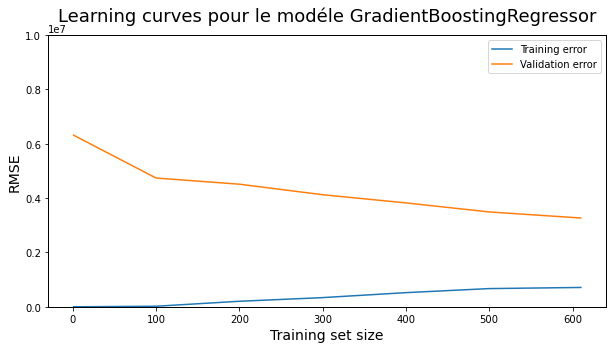

In [88]:
# Evaluation de la performance du modéle en fonction de la quantité de donnée : Learning curve

# Fonction courbe d'apprentissage

train_sizes = [1, 100, 200, 300, 400, 500, 610]
def learning_curves(estimator, data, features, target, train_sizes, cv, ylim):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, 
    scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.sqrt(-train_scores.mean(axis = 1))
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis = 1))

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('RMSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves pour le modéle GradientBoostingRegressor' 
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,ylim)
    
# Courbes d'apprentissage du modèle optimisé pour la prédiction de SiteEnergyUse avec toutes les features

plt.figure(figsize = (10,5))

learning_curves(final_model["SiteEnergyUse(kBtu)"], df, features_initial, 'SiteEnergyUse(kBtu)', train_sizes=train_sizes, cv = 5, 
                ylim = 10**7)

In [97]:
# Barplot de l'importance de la contribution de chaque variable au modèle
def plot_feature_importances(target, features):
    
    feature_importances = final_model[target][-1].feature_importances_
    
    # Les features sont triés par importance pour l'affichage graphique
    features_labels = [attrib for value, attrib in sorted(zip(feature_importances, features), reverse=True)]
    features_values = [value for value, attrib in sorted(zip(feature_importances, features), reverse=True)]

    # Affichage Bar Plot
    fig = plt.figure(1, figsize=(12,5))
    sns.barplot(x=features_labels[0:30], y=[100*v for v in features_values[0:30]])
    plt.ylabel("%")
    plt.title("Features Importances")
    plt.xticks(rotation=90)
    plt.show()

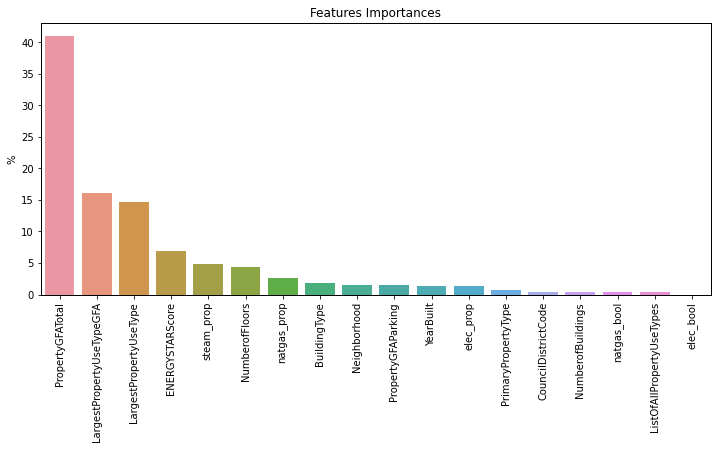

In [99]:
# Affichage graphique de l'importance de chaque variable au regard du modéle choisis

plot_feature_importances('SiteEnergyUse(kBtu)', features_initial)


In [2]:
# Fonction prédiction de la target à partir du jeu test
def plot_2(target, features):
    with plt.style.context('bmh'):

        plt.scatter(test_set[target],
                    final_model[target].predict(test_set[features]))
        plt.plot([0, max(test_set[target])], [0, max(test_set[target])], '--k')
        plt.ylabel('Target predicted')
        plt.xlabel('True Target')
        plt.title(target)
        plt.text(0.05*max(test_set[target]), 0.5*max(test_set[target]), r'$R^2$=%.2f, RMSE=%.2f' % (
            r2_score(test_set[target],
                     final_model[target].predict(test_set[features])),
            mean_squared_error(test_set[target],
                               final_model[target].predict(test_set[features]), squared=False)))
        plt.xlim([0, max(final_model[target].predict(test_set[features]))])
        plt.ylim([0, max(final_model[target].predict(test_set[features]))])

In [4]:
# Prédiction SiteEnergyUse dataset test
plot_2('SiteEnergyUse(kBtu)', features_initial)

NameError: name 'features_initial' is not defined

## Looking for best model for Emission variable 'TotalGHGEmissions'

In [102]:
# Dictionnaires de résultats
y_pred = {}
rmse = {}
r2 = {}

# Les regressors sont testés 1 à 1 par cross-validation
for name_reg, reg in regressors.items():
    print("_____", name_reg, "_____")

    pipeline = define_pipeline(preprocessor, reg)

    # cross-validation
    scores = cross_val(pipeline,
                       train_set[features_initial],
                       train_set['TotalGHGEmissions'])

    # calcul de la RMSE
    rmse[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])

    # calcul de R2
    r2[name_reg] = scores["test_r2"]

    # Affichage des résultats
    display_scores(scores,
                   scoring=["neg_mean_squared_error",
                            "neg_mean_absolute_error",
                            "r2"])

_____ Dummy _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 132.77100683133784
	 - Ecart-type : 27.83912963491818
	 - Coefficient de variation : 20.97 %


Métrique utilisé : neg_mean_absolute_error 

	 - Moyenne : 87.0954297480358
	 - Ecart-type : 11.000025936707356
	 - Coefficient de variation : 12.63 %


Métrique utilisé : r2 

	 - Moyenne : -0.017712876710684555
	 - Ecart-type : 0.016839112283134585
	 - Coefficient de variation : -95.07 %


_____ Linear _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 93.90793207694406
	 - Ecart-type : 17.92871559754327
	 - Coefficient de variation : 19.09 %


Métrique utilisé : neg_mean_absolute_error 

	 - Moyenne : 55.76878688003482
	 - Ecart-type : 8.132995632639945
	 - Coefficient de variation : 14.58 %


Métrique utilisé : r2 

	 - Moyenne : 0.4776981194621423
	 - Ecart-type : 0.1187884775723716
	 - Coefficient de variation : 24.87 %


_____ Ri

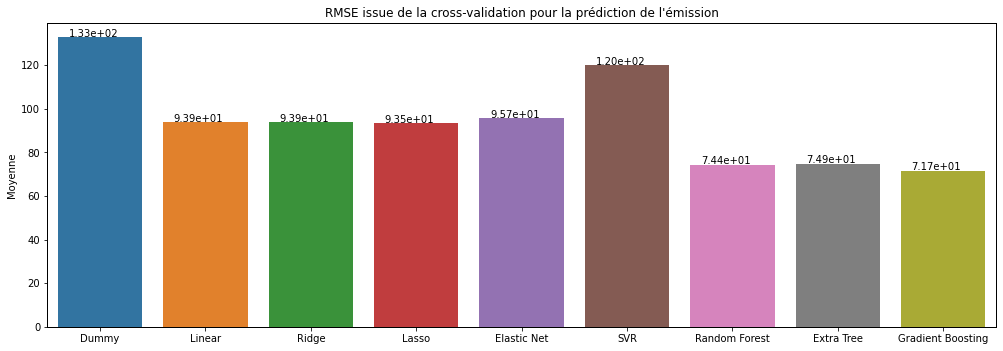

In [103]:
# Affichage des résultats de la RMSE
graphical_display(rmse, "RMSE issue de la cross-validation pour la prédiction de l'émission")

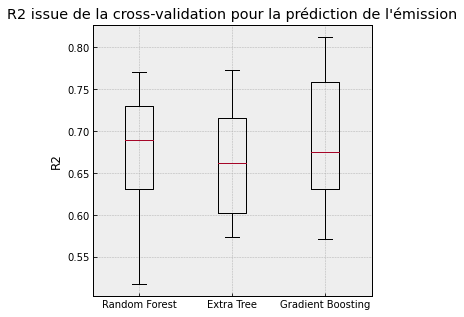

In [104]:
# Affichage des résultats en boxplot de la R2 pour les trois modéles choisis
boxplot(r2, "R2 issue de la cross-validation pour la prédiction de l'émission", "R2")

In [105]:
df['TotalGHGEmissions'].max()

1510.85

In [106]:
print('Les scores pour R2 et RMSE sont respectivement de {} et de {} soit {:.2%} d\'erreur par rapport à la valeur maximale des émissions de CO2 pour le modèle avec Gradient Boosting Regressor.'.format(r2['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean()/df['TotalGHGEmissions'].max()))

Les scores pour R2 et RMSE sont respectivement de 0.6892546102797223 et de 71.65039234509 soit 4.74% d'erreur par rapport à la valeur maximale des émissions de CO2 pour le modèle avec Gradient Boosting Regressor.


### Model Optimization  of Gradient Boosting regressor  for Emission target variable

In [108]:
# Mise à jour avec features initiales
numerical_cols = df[features_initial].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[features_initial].select_dtypes(include=['object', 'bool']).columns

# Mise à jour du preprocessor avec features initiales
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),])

In [110]:
# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid_reg_tree = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],# Méthode d'imputation des variables numériques
    'preprocessor__cat__imputer__strategy': ['mean', 'median'], # Méthode d'imputation des variables catégorielles
    'regressor__n_estimators' : [100, 110, 115, 120, 125, 130, 135], # Nombre d'arbres
    'regressor__max_depth' : range(1, 10 , 1), # Nombre de profondeurs maximums
    'regressor__max_features' : range(1, 10 , 1), # Nombre de maximum de features
    'regressor__learning_rate': [0.05, 0.1, 0.11, 0.12, 0.13, 0.2, 0.3]} #Taux d'apprentissage

In [111]:
# Optimisation du modéle grâce à la fonction 'optimiser' developée au dessus

optimiser(GradientBoostingRegressor(),
          preprocessor,
          train_set[features_initial],
          train_set['TotalGHGEmissions'],
          'TotalGHGEmissions')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 110, 'regressor__max_features': 8, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.13, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'median'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.9867273930205365
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 72.90025918514401


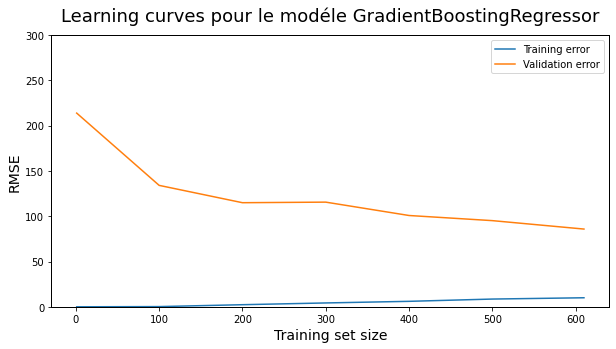

In [115]:
# Courbes d'apprentissage du modèle optimisé pour la prédiction de la variable EMISSIONS avec toutes les features

plt.figure(figsize = (10,5))

learning_curves(final_model["TotalGHGEmissions"], df, features_initial, 'TotalGHGEmissions', train_sizes=train_sizes, cv = 5, 
                ylim = 300)

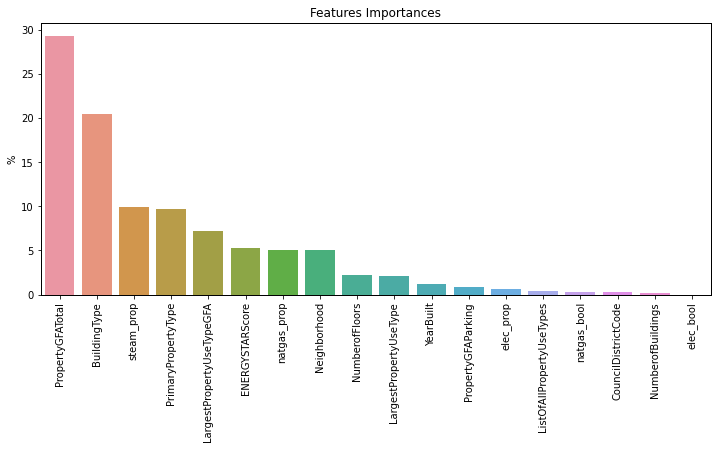

In [116]:
# Affichage graphique de l'importance de chaque variable au regard du modéle choisis pour la target EMISSIONS

plot_feature_importances('TotalGHGEmissions', features_initial)

#### BONUS : LIEN ENTRE LES HYPER_PARAMETRES  DU MODELE ET SA PERFORMANCE ( en l'occurence ici la RMSE)

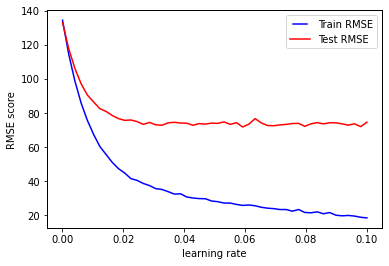

In [119]:
# Relation learning rate et RMSE
from matplotlib.legend_handler import HandlerLine2D
learning_rates = np.linspace(0.0001, 0.1, 50)
train_results = []
test_results = []

for v in learning_rates:
    model = final_model['TotalGHGEmissions'].set_params(
        regressor__learning_rate=v)
    model.fit(train_set[features_initial], train_set['TotalGHGEmissions'])

    y_train_pred = model.predict(train_set[features_initial])
    rmse = mean_squared_error(
        train_set['TotalGHGEmissions'], y_train_pred, squared=False)
    train_results.append(rmse)

    y_test_pred = model.predict(test_set[features_initial])
    rmse = mean_squared_error(
        test_set['TotalGHGEmissions'], y_test_pred, squared=False)
    test_results.append(rmse)

line1, = plt.plot(learning_rates, train_results, 'b', label='Train RMSE')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('learning rate')
plt.show()

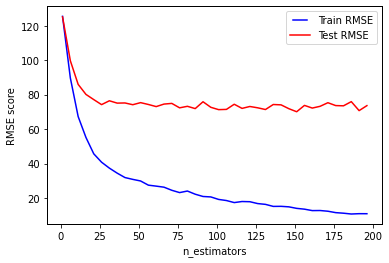

In [120]:
# Relation nombres d'arbres et RMSE
from matplotlib.legend_handler import HandlerLine2D
#learning_rates = param_grid_reg_tree['regressor__n_estimators']
n_estimators = range(1,200,5)

train_results = []
test_results = []

for v in n_estimators:
    model = final_model['TotalGHGEmissions'].set_params(
        regressor__n_estimators=v)
    model.fit(train_set[features_initial], train_set['TotalGHGEmissions'])

    y_train_pred = model.predict(train_set[features_initial])
    rmse = mean_squared_error(
        train_set['TotalGHGEmissions'], y_train_pred, squared=False)
    train_results.append(rmse)

    y_test_pred = model.predict(test_set[features_initial])
    rmse = mean_squared_error(
        test_set['TotalGHGEmissions'], y_test_pred, squared=False)
    test_results.append(rmse)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
################################### THANK YOU ###################################################### IRAQUI HOUSSAINI Karim